In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x): return x*x - 5    # Στο παράδειγμα αυτό βρίσκουμε το √5 με τη μέθοδο διχοτόμησης

In [3]:
a = 2                   # Αρχικά άκρα διαστήματος [α,b]
b = 3
n = 0                   # Πλήθος επαναλήψεων
e = 1.e-5               # Επιθυμητή ακρίβεια (εδώ θέλουμε 10^-5 = 0.00001 == 1.e-5)
while( b - a > e and n < 100):
  c = 0.5*(a + b)
  if f(c)*f(b) < 0: a = c
  else: b = c
  n = n + 1
  print('n = ', n, 'a = ', a, 'b = ', b)

n =  1 a =  2 b =  2.5
n =  2 a =  2 b =  2.25
n =  3 a =  2.125 b =  2.25
n =  4 a =  2.1875 b =  2.25
n =  5 a =  2.21875 b =  2.25
n =  6 a =  2.234375 b =  2.25
n =  7 a =  2.234375 b =  2.2421875
n =  8 a =  2.234375 b =  2.23828125
n =  9 a =  2.234375 b =  2.236328125
n =  10 a =  2.2353515625 b =  2.236328125
n =  11 a =  2.23583984375 b =  2.236328125
n =  12 a =  2.23583984375 b =  2.236083984375
n =  13 a =  2.2359619140625 b =  2.236083984375
n =  14 a =  2.23602294921875 b =  2.236083984375
n =  15 a =  2.236053466796875 b =  2.236083984375
n =  16 a =  2.236053466796875 b =  2.2360687255859375
n =  17 a =  2.2360610961914062 b =  2.2360687255859375


In [4]:
refValue = 5**0.5        # default of sqrt(5) in python
estValue = (b + a)*0.5
print('reference value = ', refValue, 'estimated value = ', estValue)
absError = abs(5**0.5 - (b + a)*0.5)
fracError = 100*absError/refValue
print('absolute error = ', absError)
print('fractional error = ', fracError, '%')

reference value =  2.23606797749979 estimated value =  2.236064910888672
absolute error =  3.0666111179300515e-06
fractional error =  0.00013714301840496437 %


In [5]:
# Ίδιος κώδικας σε Advanced μορφή

f = lambda x: x*x -5        # google search for 'python lamda function' 
sgn = lambda x: 1 if x > 0 else -1 if x < 0 else 0  # evalutes the sign of 'x', returns '0' if 'x = 0'
a = 2 
b = 3
e = 1.e-5
n = 0
a_n = []        # it's a python list see https://docs.python.org/3/tutorial/datastructures.html
b_n = []        # a_n, b_n will store all indermediate values and updates of 'a' and 'b' 

while( b - a > e and n < 100):
  c = a + (b - a)*0.5    # it's better than c = 0.5*(a + b)
  if abs(f(c)) < 1.e-12: break
  if sgn(f(c))*sgn(f(b)) < 0: a = c    # Ελέγχω το γινόμενο των προσήμων (είναι πιο γρήγορο)        
  else: b = c
  n = n + 1
  #print('n = ', n, 'a = ', a, 'b = ', b)
  a_n.append(a)
  b_n.append(b)

print('a_n list = ', a_n)
print('b_n list = ', b_n)

a_n list =  [2, 2, 2.125, 2.1875, 2.21875, 2.234375, 2.234375, 2.234375, 2.234375, 2.2353515625, 2.23583984375, 2.23583984375, 2.2359619140625, 2.23602294921875, 2.236053466796875, 2.236053466796875, 2.2360610961914062]
b_n list =  [2.5, 2.25, 2.25, 2.25, 2.25, 2.25, 2.2421875, 2.23828125, 2.236328125, 2.236328125, 2.236328125, 2.236083984375, 2.236083984375, 2.236083984375, 2.236083984375, 2.2360687255859375, 2.2360687255859375]


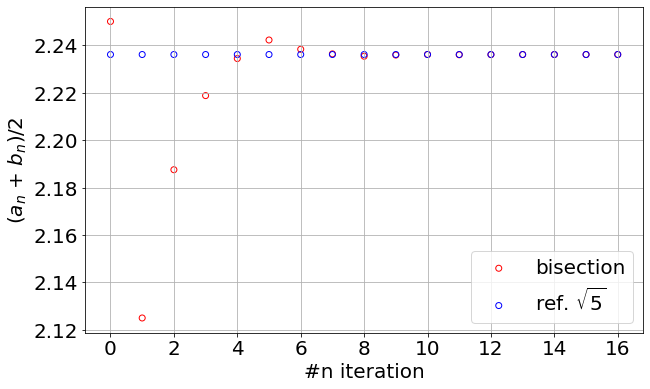

In [6]:
plt.rc('font', size=20) 

x_n= [ii for ii in range(len(b_n))]                      # Καταχωρώ σε λίστα τα σημεία
m_n = [a_n[ii] + 0.5*(b_n[ii] - a_n[ii]) for ii in x_n]  # Υπολογίζω το ενδιάμεσο σημείο για κάθε επανάληψη
ref_n  = [5**0.5 for ii in x_n]                          # Κρατά για κάθε επανάληψη την τιμή του √5
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x_n , m_n,  label = 'bisection', facecolors='none', edgecolors='r' )
ax.scatter(x_n , ref_n, label = 'ref. $\sqrt{5}$', facecolors='none', edgecolors='b' )
plt.ylabel('($a_n$ + $b_n$)/2')
plt.xlabel('#n iteration')
ax.legend()
ax.grid(True)
plt.show()

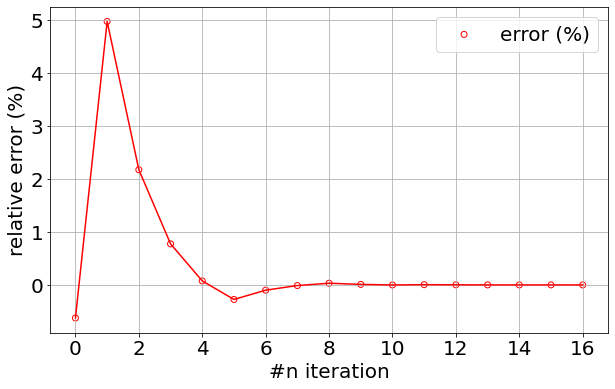

In [7]:
relErr_n = [100.*(ref_n[ii] - m_n[ii])/ref_n[ii] for ii in range(len(ref_n))]
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x_n , relErr_n,  label = 'error (%)', facecolors='none', edgecolors='r' )
ax.plot(x_n , relErr_n, 'r-')
plt.ylabel('relative error (%)')
plt.xlabel('#n iteration')
ax.legend()
ax.grid(True)
plt.show()